In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Define the plant model functions f and g
def plant_model_f(y_p):
    return y_p / (1 + y_p**2)

def plant_model_g(u_k):
    return u_k**3

#Define tanh and its derivative activation functions
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.power(np.tanh(x), 2)

#Generate random input data for u(k) 
k_data = 10000
u = np.random.uniform(-2, 2, k_data)

#Initialize and generate data for y_p(k) using equation (sum of models)
y_p = np.zeros(k_data)
for k in range(1, k_data):
    y_p[k] = plant_model_f(y_p[k-1]) + plant_model_g(u[k-1])

#Reshape input data for f and g nn plant models
f_x = y_p[:-1].reshape(-1, 1)
f_y = np.array([plant_model_f(y) for y in y_p[:-1]]).reshape(-1, 1)

g_x = u[:-1].reshape(-1, 1)
g_y = np.array([plant_model_g(u_val) for u_val in u[:-1]]).reshape(-1, 1)

#Define NN (3-Layer)
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        #Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size1)
        self.w2 = np.random.randn(hidden_size1, hidden_size2)
        self.w3 = np.random.randn(hidden_size2, output_size)
        self.b1 = np.random.randn(hidden_size1)
        self.b2 = np.random.randn(hidden_size2)
        self.b3 = np.random.randn(output_size)

    #Forward prop
    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = tanh(self.z2)
        self.z3 = np.dot(self.a2, self.w3) + self.b3
        return self.z3  

    #Backprop
    def backward(self, x, y, o, learning_rate):
        error = y - o
        d_output = error  
        d_hidden_layer2 = np.dot(d_output, self.w3.T) * tanh_derivative(self.z2)
        d_hidden_layer1 = np.dot(d_hidden_layer2, self.w2.T) * tanh_derivative(self.z1)

        #Update weights and biases
        self.w3 += np.dot(self.a2.T, d_output) * learning_rate
        self.b3 += np.sum(d_output, axis=0) * learning_rate
        self.w2 += np.dot(self.a1.T, d_hidden_layer2) * learning_rate
        self.b2 += np.sum(d_hidden_layer2, axis=0) * learning_rate
        self.w1 += np.dot(x.T, d_hidden_layer1) * learning_rate
        self.b1 += np.sum(d_hidden_layer1, axis=0) * learning_rate

        return np.mean(error ** 2)

#Train nn function
def train_nn(nn, X, Y, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
        for i in range(len(X)):

            o = nn.forward(X[i:i+1])
            loss = nn.backward(X[i:i+1], Y[i:i+1], o, learning_rate)
            
        losses.append(loss)

        if epoch % (epochs // 10) == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss}")

    return losses

#Initialize neural networks
N_f = NeuralNetwork(input_size=1, hidden_size1=20, hidden_size2=10, output_size=1)
N_g = NeuralNetwork(input_size=1, hidden_size1=20, hidden_size2=10, output_size=1)

#Train nn's
train_nn(N_g, g_x, g_y, epochs=1000, learning_rate=0.01)
train_nn(N_f, f_x, f_y, epochs=1000, learning_rate=0.01)


Epoch 0, Loss: 0.0002698602802184228
Epoch 100, Loss: 0.0009872839193614715
Epoch 200, Loss: 0.00043571782286902733
Epoch 300, Loss: 0.0002484827441049709
Epoch 400, Loss: 0.0001649896902596178
Epoch 500, Loss: 0.00012009988312762297
Epoch 600, Loss: 9.280750717608347e-05
Epoch 700, Loss: 7.478620135155313e-05
Epoch 800, Loss: 6.218201441174614e-05
Epoch 900, Loss: 5.2988813480916785e-05
Epoch 999, Loss: 4.612341362995385e-05
Epoch 0, Loss: 4.2999404589003114e-05
Epoch 100, Loss: 1.4962524228313713e-06
Epoch 200, Loss: 1.452215697353046e-06
Epoch 300, Loss: 1.5353113927691025e-06
Epoch 400, Loss: 1.5086843258763113e-06
Epoch 500, Loss: 1.3749331828455202e-06
Epoch 600, Loss: 1.214136855676194e-06
Epoch 700, Loss: 1.0629316551201776e-06
Epoch 800, Loss: 9.306978235737048e-07
Epoch 900, Loss: 8.175012066600817e-07
Epoch 999, Loss: 7.21956534210524e-07


[4.2999404589003114e-05,
 0.0001924758884482316,
 0.00014896119307147986,
 0.00011324114038662157,
 9.117614029527764e-05,
 7.669532394992145e-05,
 6.6380409554542e-05,
 5.8541847804698096e-05,
 5.2296201026181204e-05,
 4.7143639662630894e-05,
 4.278095934551557e-05,
 3.901367397469229e-05,
 3.571139122988518e-05,
 3.278345833590616e-05,
 3.016482623981489e-05,
 2.7807432400178464e-05,
 2.567474911454748e-05,
 2.373824002066367e-05,
 2.1975011998407e-05,
 2.0366237380369726e-05,
 1.8896082329900703e-05,
 1.755097208788368e-05,
 1.631908216275314e-05,
 1.5189981739972758e-05,
 1.4154379900859943e-05,
 1.3203941410494546e-05,
 1.2331149699652318e-05,
 1.1529202006924483e-05,
 1.0791926610050149e-05,
 1.0113715427532774e-05,
 9.489467523457677e-06,
 8.91454055464277e-06,
 8.384708198385762e-06,
 7.8961222561683e-06,
 7.445278557377206e-06,
 7.028986063761816e-06,
 6.644338752467312e-06,
 6.288689966430527e-06,
 5.95962899295693e-06,
 5.65495967446061e-06,
 5.3726808843399625e-06,
 5.11096

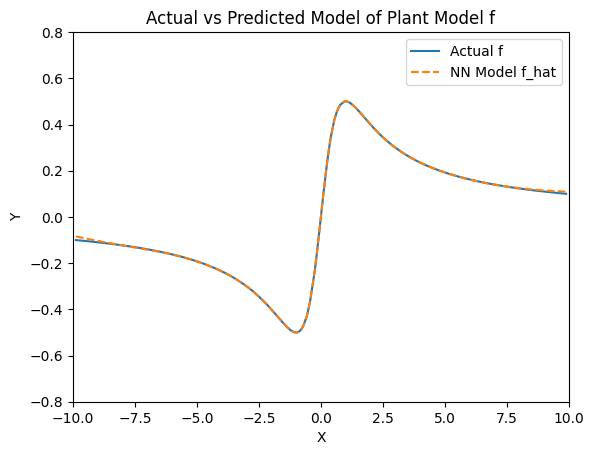

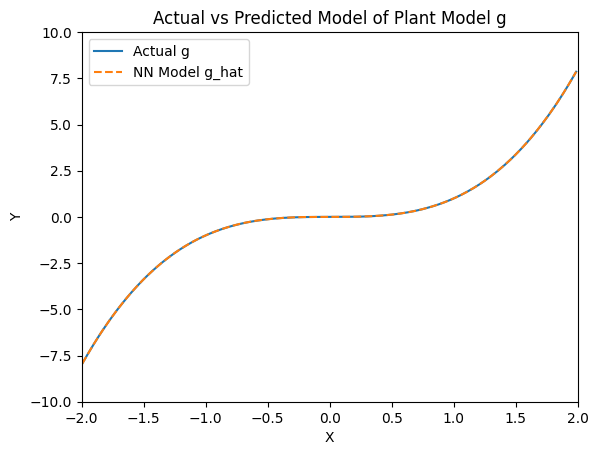

In [4]:
#Generate random inputs for f [-10,10] and g [-2,2]
u_data_f = np.random.uniform(-10, 10, 500)
u_data_f.sort()

u_data_g = np.random.uniform(-2, 2, 500)
u_data_g.sort()

#Generate outputs of f and g NN models
f_nn_model = np.array([N_f.forward(np.array([[y]])) for y in u_data_f]).flatten()
g_nn_model = np.array([N_g.forward(np.array([[u]])) for u in u_data_g]).flatten()

#Generate actual outputs of f and g plant functions
actual_f = plant_model_f(u_data_f)
actual_g = plant_model_g(u_data_g)

plt.plot(u_data_f,actual_f, label='Actual f')
plt.plot(u_data_f,f_nn_model, label='NN Model f_hat', linestyle='--')
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-0.8,0.8)
plt.xlim(-10,10)
plt.legend()
plt.title('Actual vs Predicted Model of Plant Model f')
plt.show()

plt.plot(u_data_g,actual_g,label='Actual g')
plt.plot(u_data_g,g_nn_model, label='NN Model g_hat',linestyle='--')
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-10,10)
plt.xlim(-2,2)
plt.legend()
plt.title('Actual vs Predicted Model of Plant Model g')
plt.show()

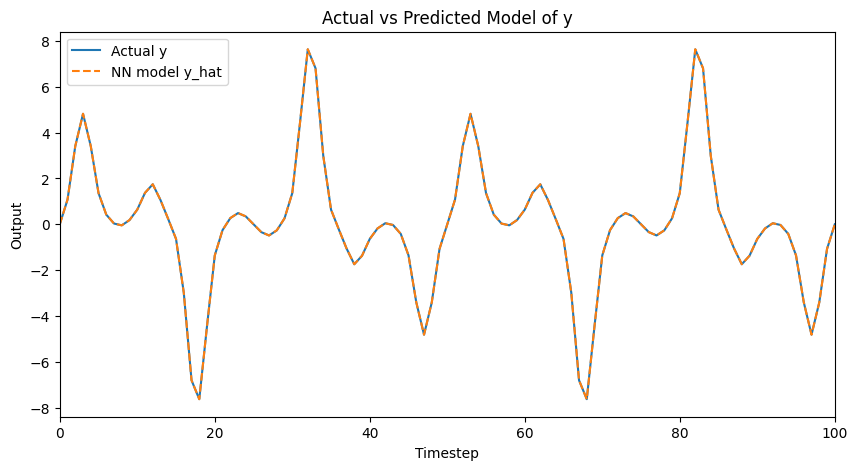

In [6]:
#Generate random sinusoidal inputs
k_steps = np.arange(1000)
u = np.sin(2 * np.pi * k_steps / 25) + np.sin(2 * np.pi * k_steps / 10)

#Generate outputs of f and g NN models, calculate predicted y model
f_nn_model = np.array([N_f.forward(np.array([[y]])) for y in u]).flatten()
g_nn_model = np.array([N_g.forward(np.array([[u]])) for u in u]).flatten()
y_hat = f_nn_model + g_nn_model


#Generate actual outputs of f and g functions
actual_f = plant_model_f(u)
actual_g = plant_model_g(u)
actual_y = actual_f + actual_g

#Plot
range_slice = slice(0, 101)

plt.figure(figsize=(10, 5))
plt.plot(k_steps[range_slice], actual_y[range_slice], label='Actual y')
plt.plot(k_steps[range_slice], y_hat[range_slice], label='NN model y_hat', linestyle='--')
plt.xlim(0, 100)
plt.xlabel('Timestep')
plt.ylabel('Output')
plt.legend()
plt.title('Actual vs Predicted Model of y')
plt.show()
